In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

from pyod.models.cof import COF

In [2]:
!pip install pyod

In [3]:
PROJECT_PATH = "C:/Users/amlas/Documents/M1 SID/ProjetInterpromo/ProjectInterPromo/"

In [4]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

In [13]:
# Lecture du fichier de donnée
data_v0 = pd.read_csv(PROJECT_PATH + "data/sortie/Données_v0/Donnees_V0_NAN_supprimes.csv")

print("Nombre de fraude :", sum(data_v0["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_v0))
print("Ratio : ", sum(data_v0["TOP_FRAUDE"]) / len(data_v0) * 100)

# Suppression des variables qualitative
quali_col = []
count = 0
for i, name in zip(data_v0.dtypes, data_v0.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = data_v0.drop(columns=quali_col + ["Unnamed: 0"])

# 
data_quanti = data_quanti.sample(10000)

print("------------ Sur un echantillion ------------")
print("Nombre de fraude :", sum(data_quanti["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_quanti))
print("Ratio : ", sum(data_quanti["TOP_FRAUDE"]) / len(data_quanti) * 100)

Nombre de fraude : 1479
Nombre de données :  644348
Ratio :  0.22953435100287423
------------ Sur un echantillion ------------
Nombre de fraude : 17
Nombre de données :  10000
Ratio :  0.16999999999999998


In [14]:
# Modele de prediction qui retourne un score
data_quanti_out = data_quanti.drop(['TOP_FRAUDE','TOP_FRAUDE_VIREMENT','TOP_FRAUDE_CARTE'], axis=1)
outliers_fraction = 0.01
clf = COF(contamination = outliers_fraction)
xx,yy = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [15]:
clf.fit(data_quanti)

COF(contamination=0.01, method='fast', n_neighbors=None)

In [16]:
score = clf.decision_function(data_quanti_out)
score
set(score)

{0.875174648081412,
 1.1818346099505135,
 1.2564785777669272,
 1.0263523154813186,
 1.0405133733651155,
 1.2121176867170504,
 1.1847654292910192,
 1.2313115542038986,
 1.1003641108275133,
 1.1878985485458315,
 1.125111859109893,
 2.1009660246518393,
 1.1858350016450458,
 1.1304619069857937,
 1.3975292582374197,
 1.063142861682728,
 1.523350546011635,
 1.0841949703114653,
 1.257269533144083,
 1.1293400911212506,
 1.107757817562409,
 1.2925248967432104,
 1.0717045034717863,
 1.6429968835860869,
 1.0917039465265086,
 1.0928619436725464,
 2.3608949838361193,
 1.026190791951245,
 0.9497191499715583,
 1.0857323583866374,
 1.2857565557135486,
 1.1009377576558719,
 0.9442835108634229,
 1.2382127639111589,
 1.308271351624606,
 1.2389045559334393,
 1.55461711076231,
 1.0675189797058824,
 1.319466444993305,
 1.035783453006298,
 1.2636603380188824,
 1.2291153060342475,
 1.008580800621632,
 1.352465688711265,
 1.0533959918621911,
 0.9475062076692875,
 1.231122616522337,
 1.5448231276471442,
 1.0814

<ipython-input-4-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


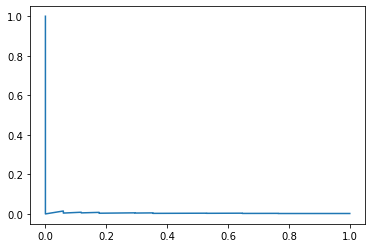

Air sous la courbe :  0.003745358558347284


In [17]:
value, f1_score, precision, recall = evaluation(score, data_quanti["TOP_FRAUDE"], display=True)

# L'air sous la courbe
print("Air sous la courbe : ", value)